In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import zipfile

**Loading the dataset**

The features in th dataset are ,

No (Index/Serial Number): A unique identifier for each row in the dataset.

Year: The year in which the PM2.5 and meteorological data were recorded (2010–2015).

Month: The month (1–12) in which the data was recorded.Useful for capturing seasonal variations in PM2.5 levels.For example, higher levels in winter due to coal-based heating.

Day: The day of the month when the data was recorded (1–31).

Hour: The hour of the day when the data was recorded (0–23).

Dew Point: Dew point temperature.

Temperature: Atmospheric temperature in Celsius.

Pressure: Atmospheric pressure in hPa.

CBWD (Combined Wind Direction): A categorical variable representing wind direction (e.g., NW, NE, SW, SE).

IWS (Integrated Wind Speed):  The cumulative wind speed in meters per second (m/s) over a specific period.

IS (Integrated Snowfall): The cumulative snowfall in millimeters (mm) over a specific period.

IR (Integrated Rainfall): The cumulative rainfall in millimeters (mm) over a specific period.

PM2.5 (Target Variable): The concentration of fine particulate matter (PM2.5) in micrograms per cubic meter (µg/m³).




In [68]:
zip_path = "beijing+pm2+5+data.zip"

# Opening the ZIP file
with zipfile.ZipFile(zip_path, 'r') as z:
    file_list = z.namelist()
    print("Files in zip:", file_list)  

    with z.open("PRSA_data_2010.1.1-2014.12.31.csv") as f:
        df_raw = pd.read_csv(f, delimiter=",", low_memory=False)

print(df_raw.head())

Files in zip: ['PRSA_data_2010.1.1-2014.12.31.csv']
   No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0


In [69]:
df_raw.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


The dataset doesn't have any null values except the column pm2.5

In [70]:
df_raw.dtypes

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object

In [71]:
#create a datetime feature from year,month,day and hour features
df_raw['Datetime'] = pd.to_datetime(df_raw[['year', 'month', 'day', 'hour']])

# Format the Datetime column as yyyy-mm-dd HH:mm:ss
df_raw['Datetime'] = df_raw['Datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')

# first few rows to verify
df_raw.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Datetime
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


In [72]:
df = df_raw.copy()

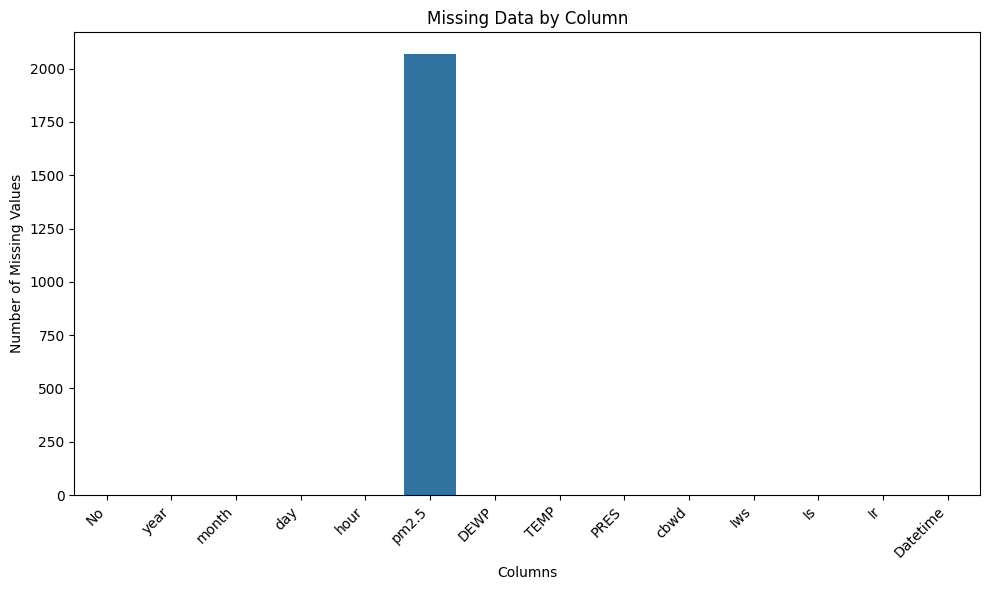

In [73]:
# Check for missing values
missing_counts = df_raw.isnull().sum()

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_counts.index, y=missing_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Missing Data by Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.tight_layout()
plt.show()

<Axes: title={'center': 'NaN Counts Over Time'}, xlabel='Datetime'>

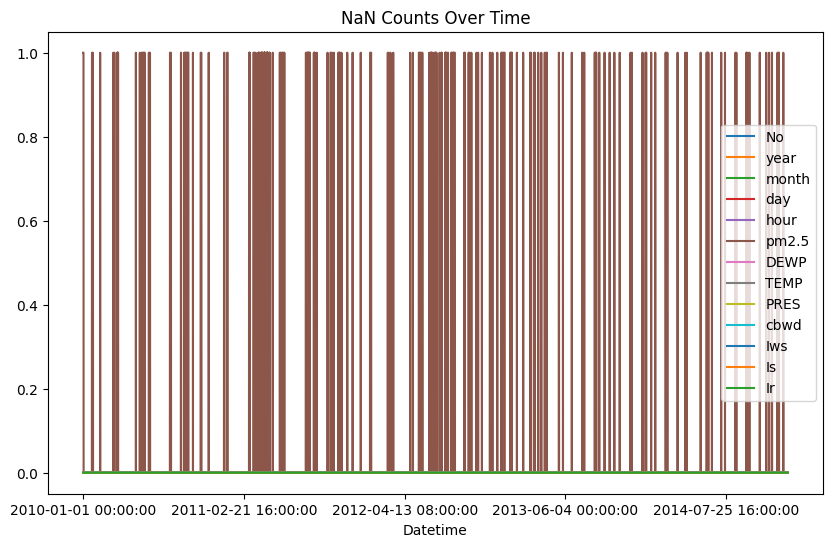

In [74]:
# Drop unwanted columns for NaN analysis (excluding 'Datetime' or 'Date')
df_na = df_raw.drop('Datetime', axis=1).isna().groupby(df_raw['Datetime'], sort=False).sum().reset_index()

# Plot NaN counts over time using 'Datetime' as x-axis
df_na.plot(x='Datetime', y=df_na.columns[1:], figsize=(10, 6), title="NaN Counts Over Time")

In [78]:
#linear interpolation for numeric columns to fill missing values
df_numeric = df_raw.drop(columns=['Datetime'])  # Exclude non-numeric columns
df_numeric = df_numeric.interpolate(method='linear', limit_direction='both')

# Replace original numeric columns with imputed values
df_raw.update(df_numeric)

# Verify missing data is handled
print(df_raw.isna().sum())

No          0
year        0
month       0
day         0
hour        0
pm2.5       0
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
Datetime    0
dtype: int64


/var/folders/1y/p5k2q_ms1kqfyyfj3ptdpwsc0000gn/T/ipykernel_69588/3684524465.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_numeric = df_numeric.interpolate(method='linear', limit_direction='both')


In [79]:
desc = df_raw.describe()

print(desc)

                 No          year         month           day          hour  \
count  43824.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean   21912.500000   2012.000000      6.523549     15.727820     11.500000   
std    12651.043435      1.413842      3.448572      8.799425      6.922266   
min        1.000000   2010.000000      1.000000      1.000000      0.000000   
25%    10956.750000   2011.000000      4.000000      8.000000      5.750000   
50%    21912.500000   2012.000000      7.000000     16.000000     11.500000   
75%    32868.250000   2013.000000     10.000000     23.000000     17.250000   
max    43824.000000   2014.000000     12.000000     31.000000     23.000000   

              pm2.5          DEWP          TEMP          PRES           Iws  \
count  43824.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean      98.261809      1.817246     12.448521   1016.447654     23.889140   
std       90.944915     14.433440     12.198613    

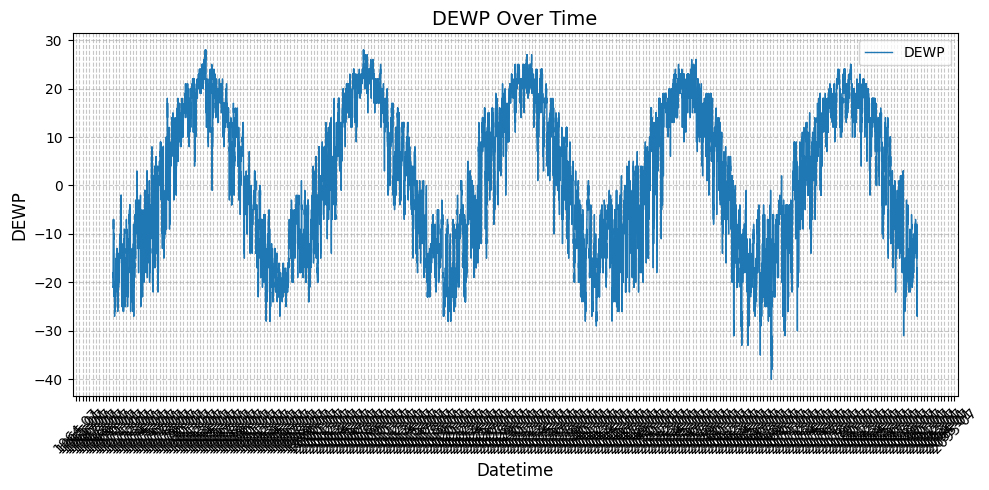

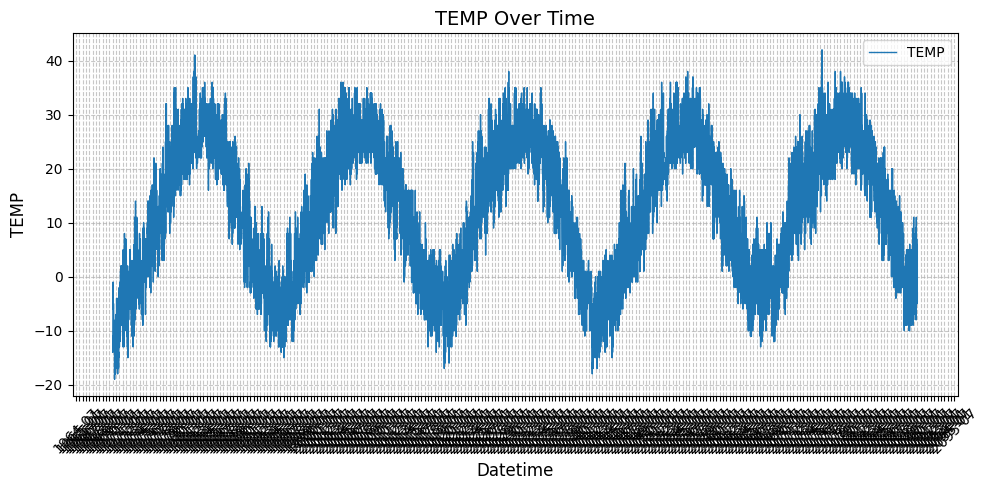

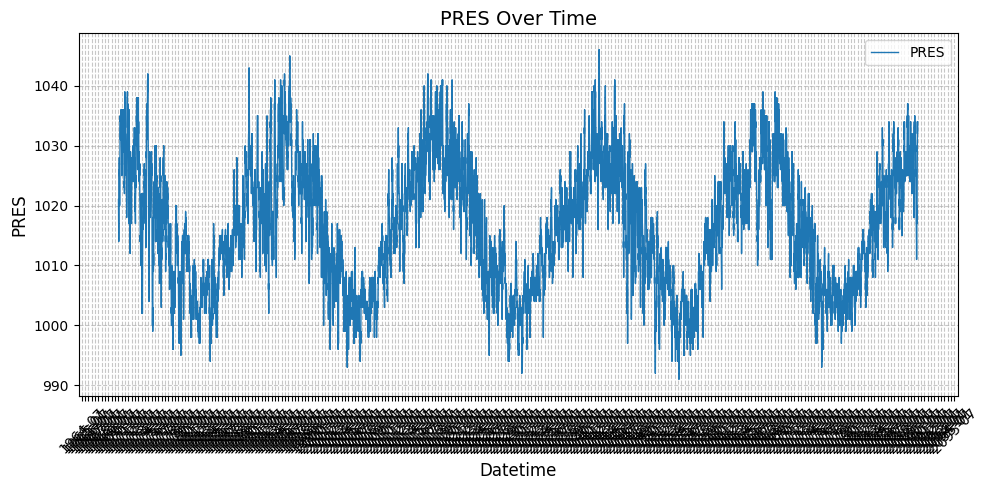

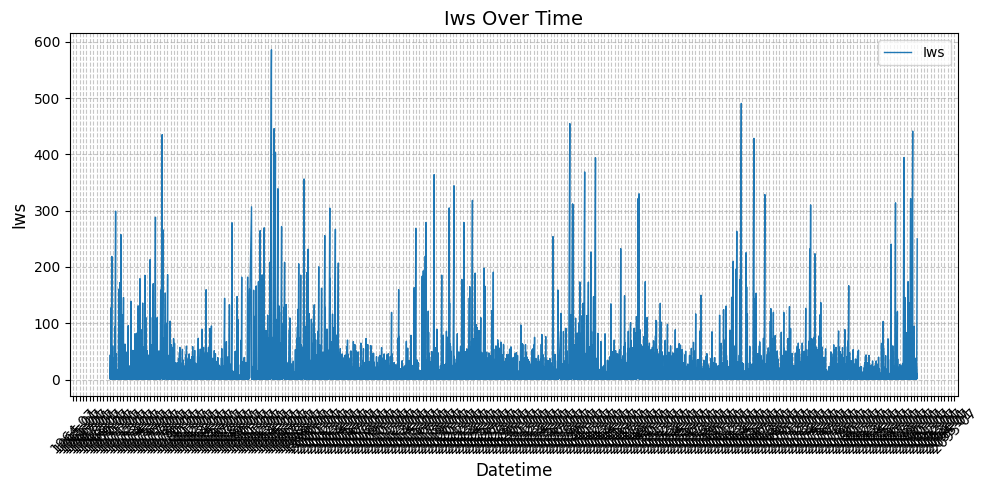

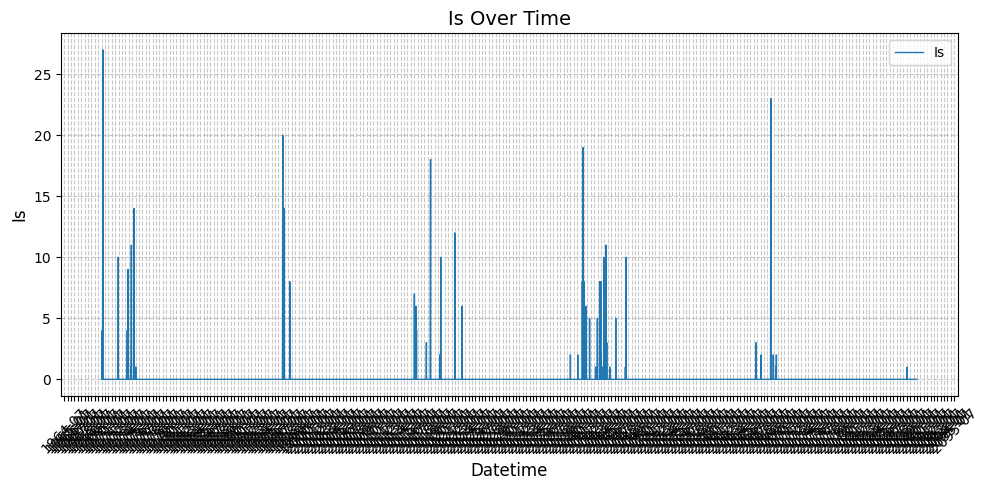

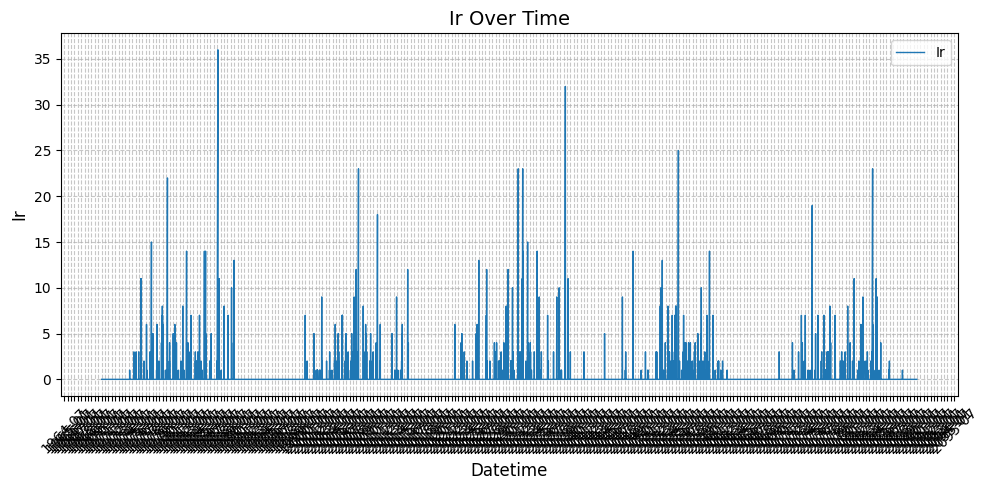

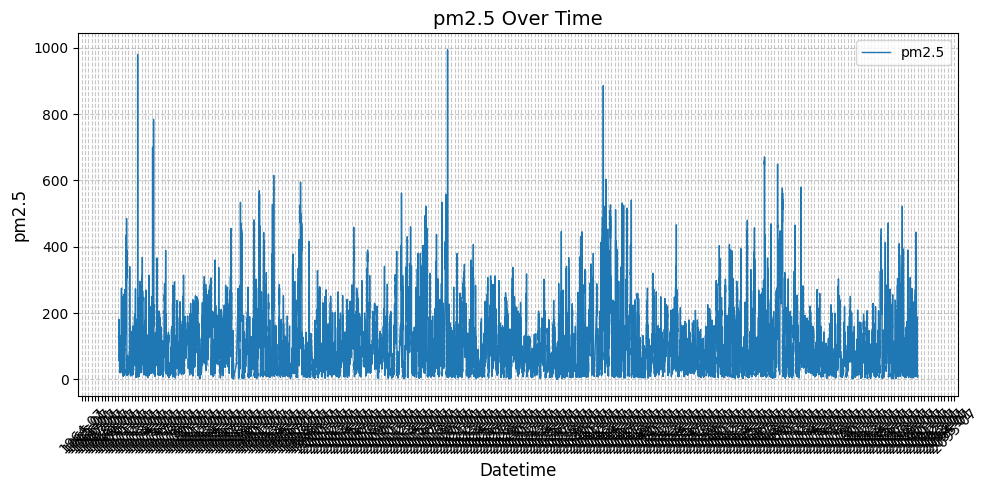

In [80]:
variables_to_plot = ['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir','pm2.5']

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plot each variable
for variable in variables_to_plot:
    plt.figure(figsize=(10, 5))
    plt.plot(df_raw['Datetime'], df_raw[variable], label=variable, linewidth=1)
    plt.title(f"{variable} Over Time", fontsize=14)
    plt.xlabel("Datetime", fontsize=12)
    plt.ylabel(variable, fontsize=12)
    plt.legend(loc='upper right', fontsize=10)

    # Fix x-axis ticks to show only every 6 months
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Show ticks every 6 months
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as 'YYYY-MM'

    # Avoid overlapping labels
    plt.xticks(rotation=45, fontsize=10)

    # Add grid and adjust layout
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    

/var/folders/1y/p5k2q_ms1kqfyyfj3ptdpwsc0000gn/T/ipykernel_69588/3725914754.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(freq='M')  # 'M' represents monthly frequency


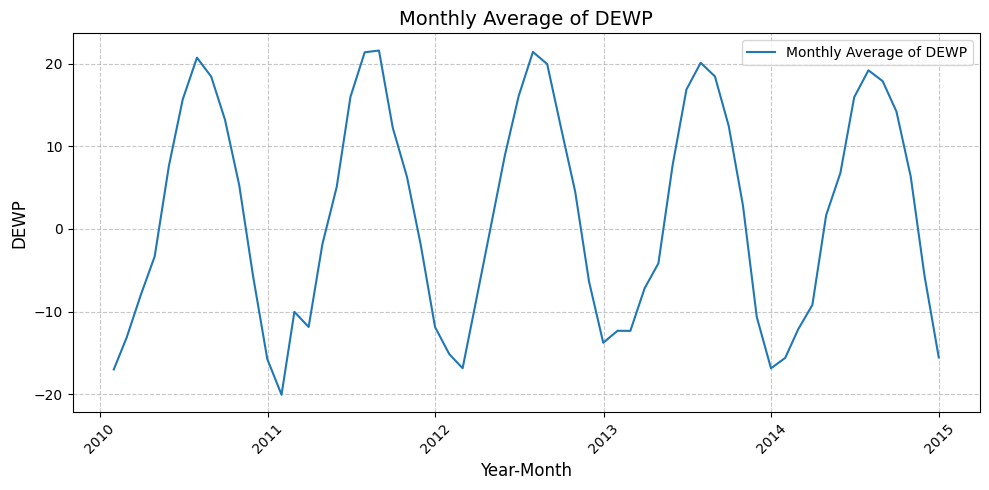

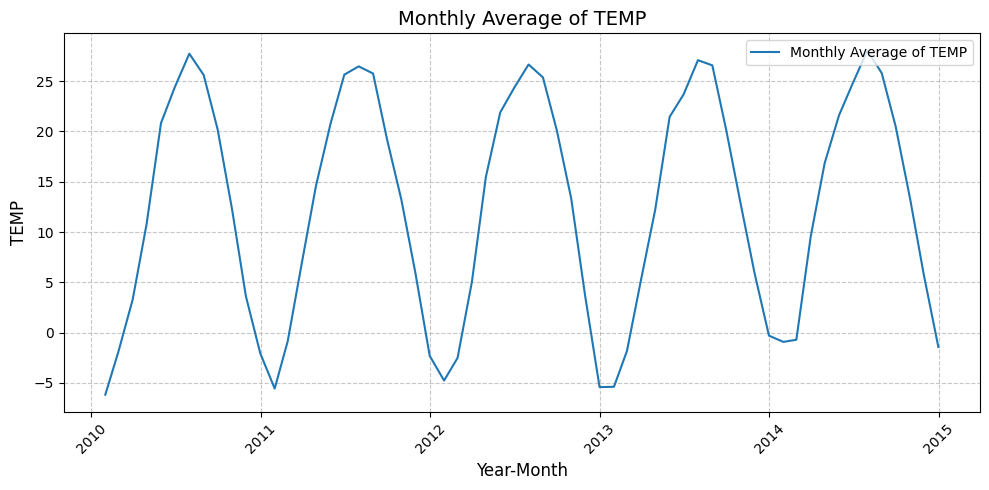

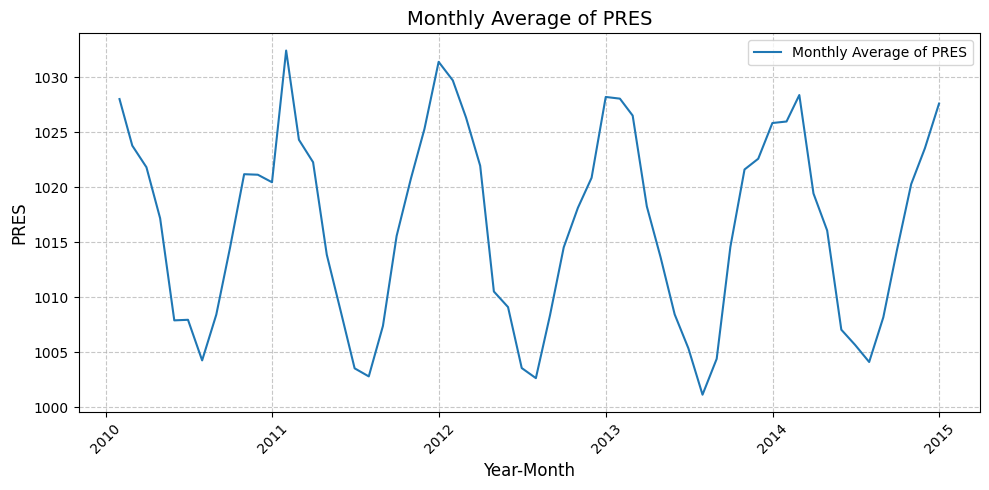

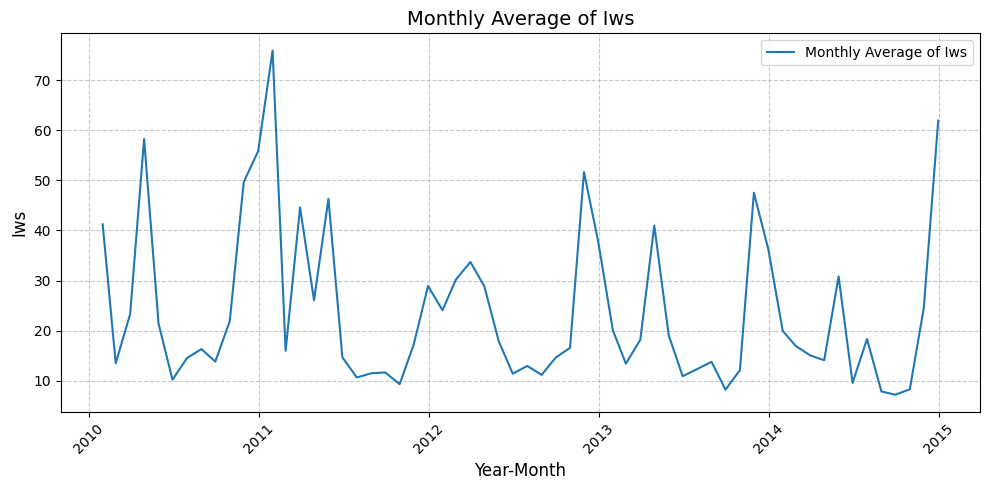

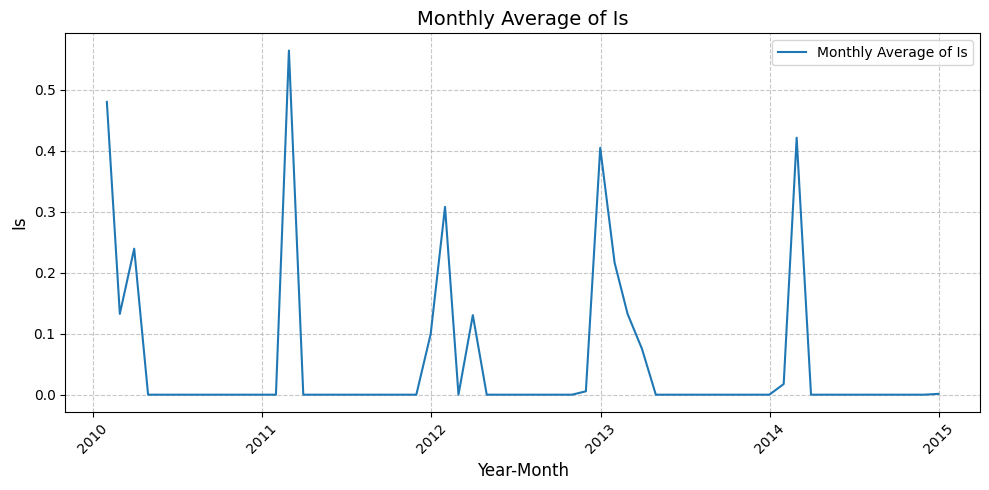

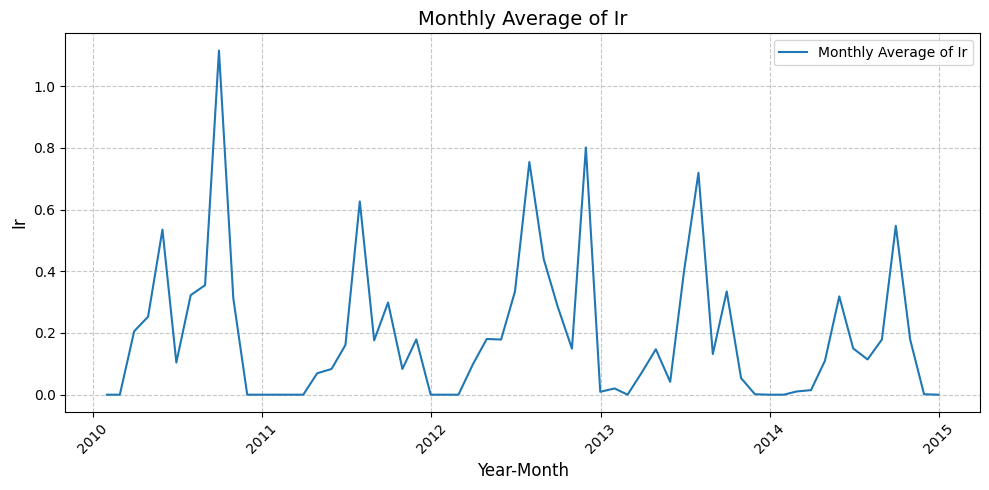

In [81]:
# Combine year, month, day, and hour to create 'Datetime'
df_raw['Datetime'] = pd.to_datetime(df_raw[['year', 'month', 'day', 'hour']])

# 'Datetime' as the index
df_raw.set_index('Datetime', inplace=True)

# Group by monthly intervals and calculate the mean
monthly_avg = df_raw.groupby(
    pd.Grouper(freq='M')  # 'M' represents monthly frequency
)[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir','pm2.5']].mean().reset_index()

# Function to plot the monthly average
def plot_monthly_average(data, variables, datetime_column):
    for variable in variables:
        plt.figure(figsize=(10, 5))
        plt.plot(data[datetime_column], data[variable], label=f"Monthly Average of {variable}", linewidth=1.5)
        plt.title(f"Monthly Average of {variable}", fontsize=14)
        plt.xlabel("Year-Month", fontsize=12)
        plt.ylabel(variable, fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.legend(loc='upper right', fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

# the plotting function
plot_monthly_average(
    data=monthly_avg,
    variables=['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir'],
    datetime_column='Datetime'
)

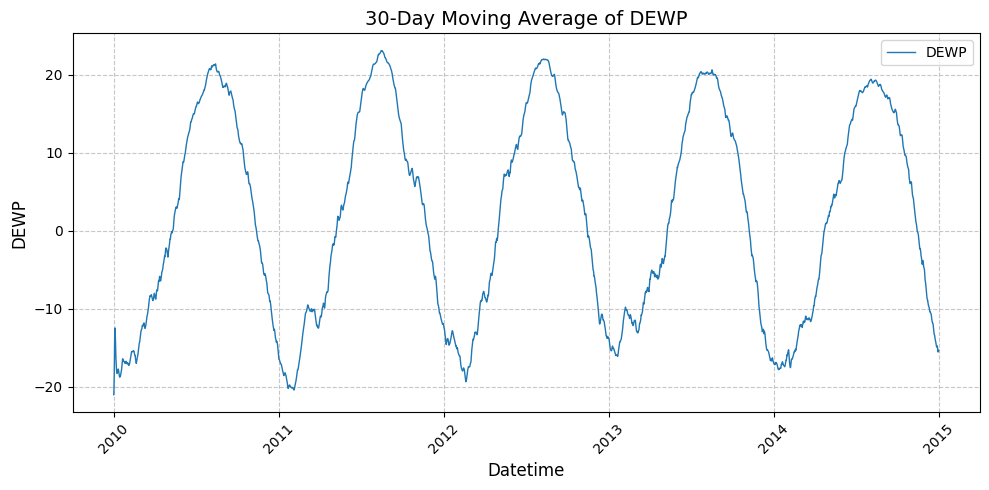

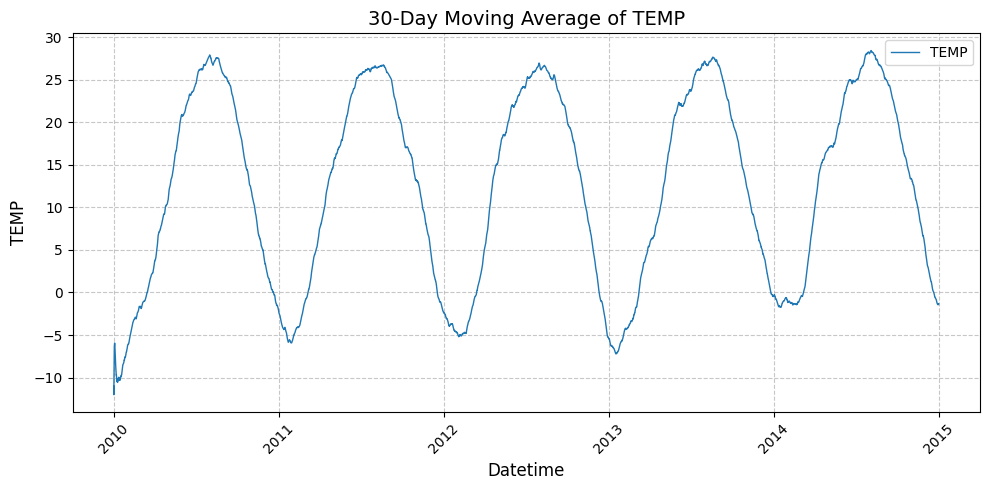

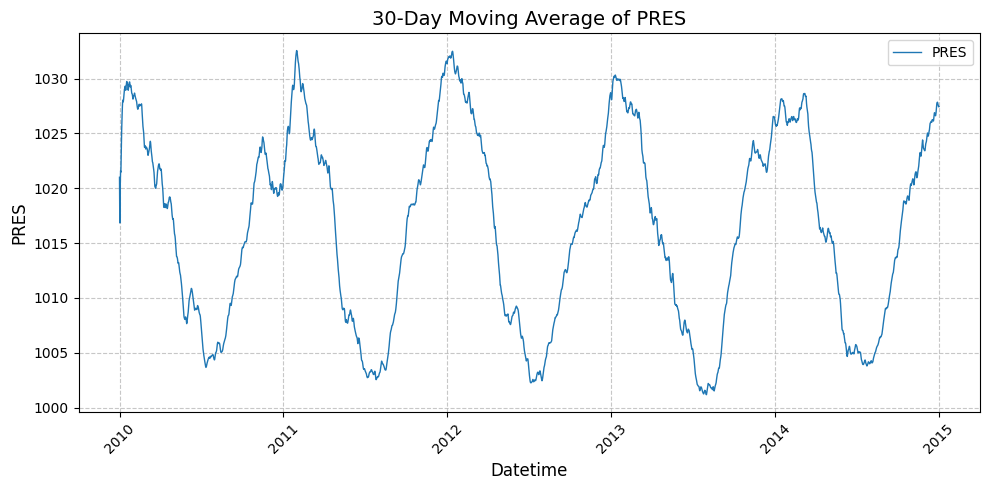

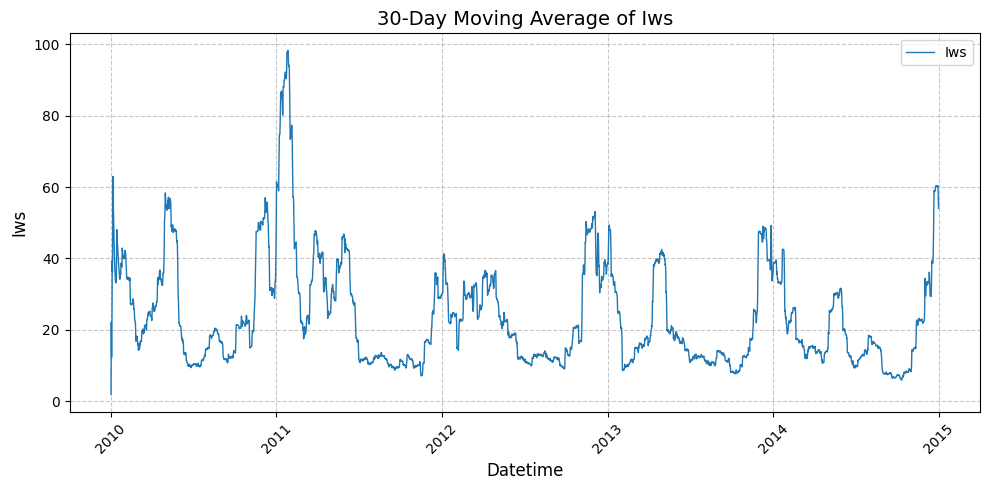

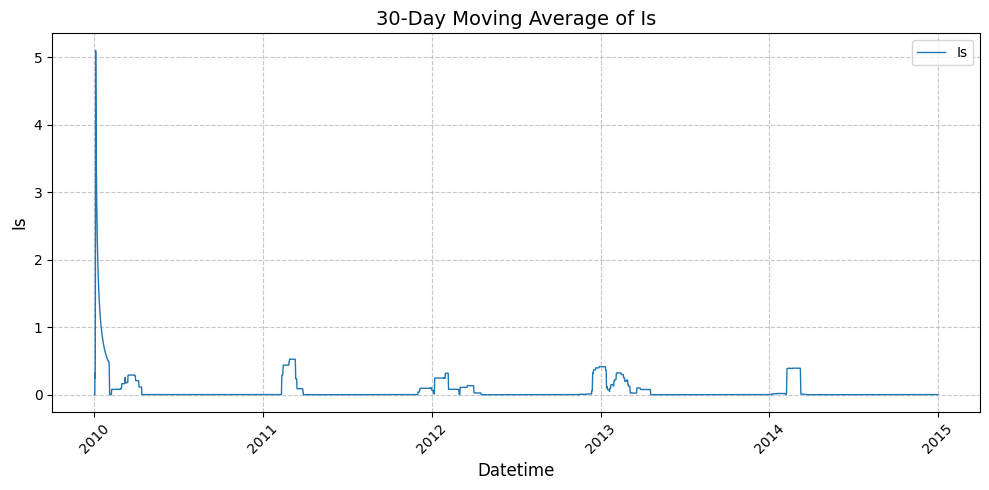

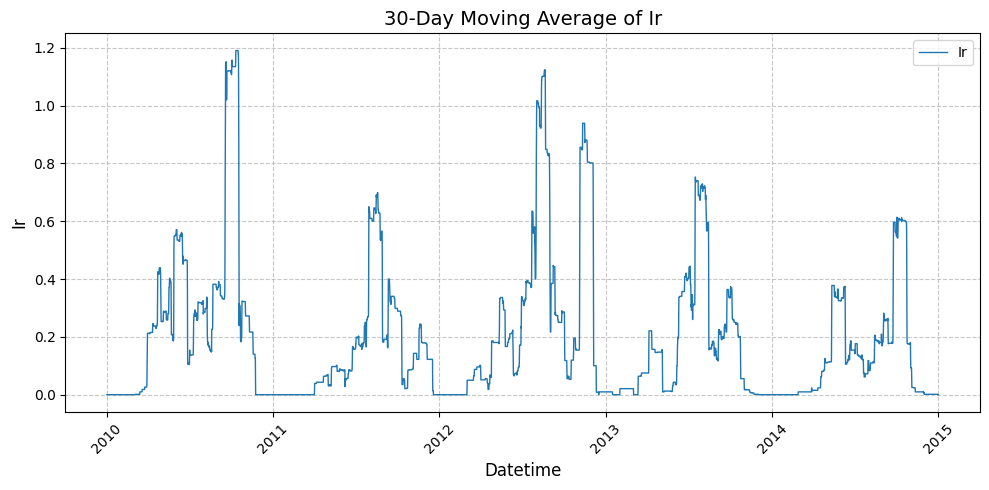

In [82]:
if 'Datetime' not in df_raw.columns:
    df_raw['Datetime'] = pd.to_datetime(df_raw[['year', 'month', 'day', 'hour']])

# the moving average
window_size = 30 * 24  # 30 days * 24 hours = 720 rows (assuming hourly data)

# a new DataFrame for moving averages
df_moving_avg = df_raw[['Datetime', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir','pm2.5']].copy()

# Applying rolling mean
for variable in ['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']:
    df_moving_avg[variable] = df_moving_avg[variable].rolling(window=window_size, min_periods=1).mean()

# Plot the moving averages
for variable in ['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']:
    plt.figure(figsize=(10, 5))
    plt.plot(df_moving_avg['Datetime'], df_moving_avg[variable], label=variable, linewidth=1)
    plt.title(f"30-Day Moving Average of {variable}", fontsize=14)
    plt.xlabel("Datetime", fontsize=12)
    plt.ylabel(variable, fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.legend(loc='upper right', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Lets take a look at correlation matrix for the main features

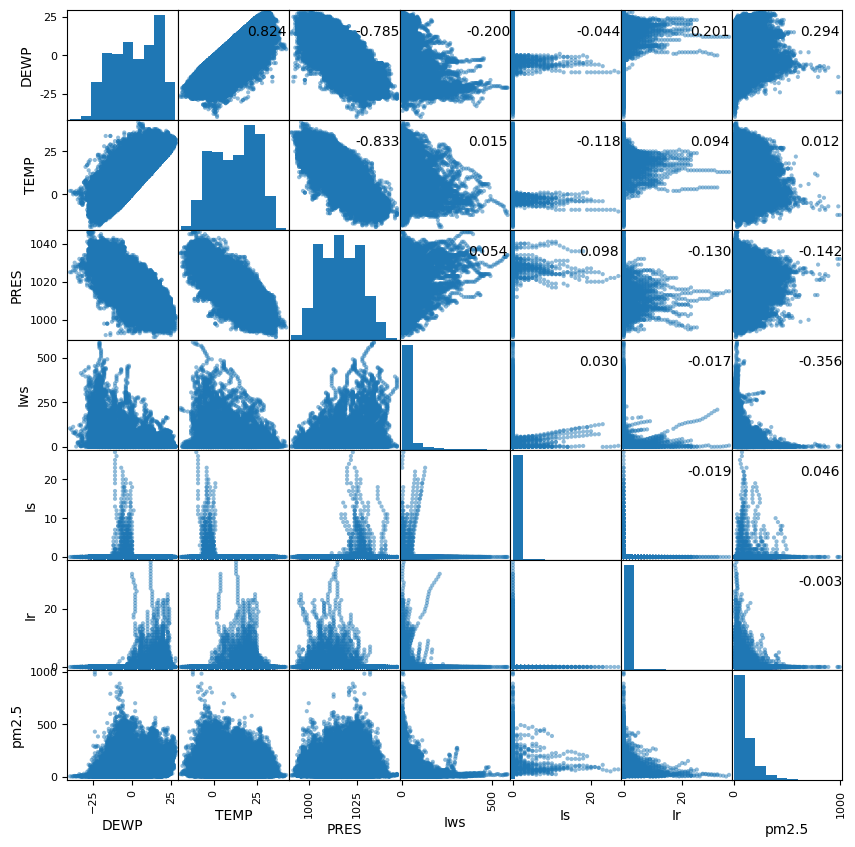

In [83]:
axes = pd.plotting.scatter_matrix(df_raw[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir','pm2.5']], alpha=0.5,figsize = [10,10])
corr = df_raw[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir','pm2.5']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

In [84]:
df_moving_avg.head()

,Datetime,DEWP,TEMP,PRES,Iws,Is,Ir,pm2.5
Datetime,,,,,,,,
2010-01-01 00:00:00,2010-01-01 00:00:00,-21.0,-11.000000,1021.00,1.790000,0.0,0.0,129.0
2010-01-01 01:00:00,2010-01-01 01:00:00,-21.0,-11.500000,1020.50,3.355000,0.0,0.0,129.0
2010-01-01 02:00:00,2010-01-01 02:00:00,-21.0,-11.333333,1020.00,4.473333,0.0,0.0,129.0
2010-01-01 03:00:00,2010-01-01 03:00:00,-21.0,-12.000000,1019.75,5.815000,0.0,0.0,129.0
2010-01-01 04:00:00,2010-01-01 04:00:00,-20.8,-12.000000,1019.40,7.246000,0.0,0.0,129.0


In [90]:
df_raw.head()

,Datetime,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010-01-01 00:00:00,1,2010,1,1,0,129.0,-21,-11.0,1021.0,NW,1.79,0,0
1,2010-01-01 01:00:00,2,2010,1,1,1,129.0,-21,-12.0,1020.0,NW,4.92,0,0
2,2010-01-01 02:00:00,3,2010,1,1,2,129.0,-21,-11.0,1019.0,NW,6.71,0,0
3,2010-01-01 03:00:00,4,2010,1,1,3,129.0,-21,-14.0,1019.0,NW,9.84,0,0
4,2010-01-01 04:00:00,5,2010,1,1,4,129.0,-20,-12.0,1018.0,NW,12.97,0,0


In [104]:
if 'Datetime' in df_moving_avg.index.names:
    print("'Datetime' is in the index.")
elif 'Datetime' in df_moving_avg.columns:
    print("'Datetime' is a column.")
else:
    print("'Datetime' is neither in the index nor a column.")

'Datetime' is in the index.


In [101]:
# Verify the result
df_raw.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
Datetime,,,,,,,,,,,,,
2010-01-01 00:00:00,1,2010,1,1,0,129.0,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,2010,1,1,1,129.0,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,2010,1,1,2,129.0,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,2010,1,1,3,129.0,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,2010,1,1,4,129.0,-20,-12.0,1018.0,NW,12.97,0,0


In [109]:
# Remove the 'Datetime' column from df_moving_avg (if it exists)
if 'Datetime' in df_moving_avg.columns:
    df_moving_avg = df_moving_avg.drop(columns='Datetime')

# Verify the result
print(df_moving_avg.head())

                     DEWP       TEMP     PRES       Iws   Is   Ir  pm2.5
Datetime                                                                
2010-01-01 00:00:00 -21.0 -11.000000  1021.00  1.790000  0.0  0.0  129.0
2010-01-01 01:00:00 -21.0 -11.500000  1020.50  3.355000  0.0  0.0  129.0
2010-01-01 02:00:00 -21.0 -11.333333  1020.00  4.473333  0.0  0.0  129.0
2010-01-01 03:00:00 -21.0 -12.000000  1019.75  5.815000  0.0  0.0  129.0
2010-01-01 04:00:00 -20.8 -12.000000  1019.40  7.246000  0.0  0.0  129.0


In [110]:
# Remove columns in df_raw that have the same names as in df_moving_avg (excluding the index)
columns_to_drop = [col for col in df_raw.columns if col in df_moving_avg.columns]
df_raw_filtered = df_raw.drop(columns=columns_to_drop, errors='ignore')

# Merge the two DataFrames on the 'Datetime' index
merged_df = pd.merge(
    df_raw_filtered,
    df_moving_avg,
    left_index=True,   # Merge on the 'Datetime' index of df_raw
    right_index=True,  # Merge on the 'Datetime' index of df_moving_avg
    how='inner'        # Use inner join to keep only matching rows
)

# Display the result
merged_df.head()

                     No  year  month  day  hour cbwd  DEWP       TEMP  \
Datetime                                                                
2010-01-01 00:00:00   1  2010      1    1     0   NW -21.0 -11.000000   
2010-01-01 01:00:00   2  2010      1    1     1   NW -21.0 -11.500000   
2010-01-01 02:00:00   3  2010      1    1     2   NW -21.0 -11.333333   
2010-01-01 03:00:00   4  2010      1    1     3   NW -21.0 -12.000000   
2010-01-01 04:00:00   5  2010      1    1     4   NW -20.8 -12.000000   

                        PRES       Iws   Is   Ir  pm2.5  
Datetime                                                 
2010-01-01 00:00:00  1021.00  1.790000  0.0  0.0  129.0  
2010-01-01 01:00:00  1020.50  3.355000  0.0  0.0  129.0  
2010-01-01 02:00:00  1020.00  4.473333  0.0  0.0  129.0  
2010-01-01 03:00:00  1019.75  5.815000  0.0  0.0  129.0  
2010-01-01 04:00:00  1019.40  7.246000  0.0  0.0  129.0  


In [111]:
merged_df.head()

,No,year,month,day,hour,cbwd,DEWP,TEMP,PRES,Iws,Is,Ir,pm2.5
Datetime,,,,,,,,,,,,,
2010-01-01 00:00:00,1,2010,1,1,0,NW,-21.0,-11.000000,1021.00,1.790000,0.0,0.0,129.0
2010-01-01 01:00:00,2,2010,1,1,1,NW,-21.0,-11.500000,1020.50,3.355000,0.0,0.0,129.0
2010-01-01 02:00:00,3,2010,1,1,2,NW,-21.0,-11.333333,1020.00,4.473333,0.0,0.0,129.0
2010-01-01 03:00:00,4,2010,1,1,3,NW,-21.0,-12.000000,1019.75,5.815000,0.0,0.0,129.0
2010-01-01 04:00:00,5,2010,1,1,4,NW,-20.8,-12.000000,1019.40,7.246000,0.0,0.0,129.0


Correlation Matrix:
           DEWP      TEMP      PRES       Iws        Is        Ir     pm2.5
DEWP   1.000000  0.966303 -0.901822 -0.619877 -0.344264  0.602646 -0.068616
TEMP   0.966303  1.000000 -0.946358 -0.552976 -0.421175  0.535339 -0.090266
PRES  -0.901822 -0.946358  1.000000  0.453904  0.334760 -0.497139  0.108766
Iws   -0.619877 -0.552976  0.453904  1.000000  0.132667 -0.276594 -0.060423
Is    -0.344264 -0.421175  0.334760  0.132667  1.000000 -0.210726  0.033409
Ir     0.602646  0.535339 -0.497139 -0.276594 -0.210726  1.000000 -0.059904
pm2.5 -0.068616 -0.090266  0.108766 -0.060423  0.033409 -0.059904  1.000000


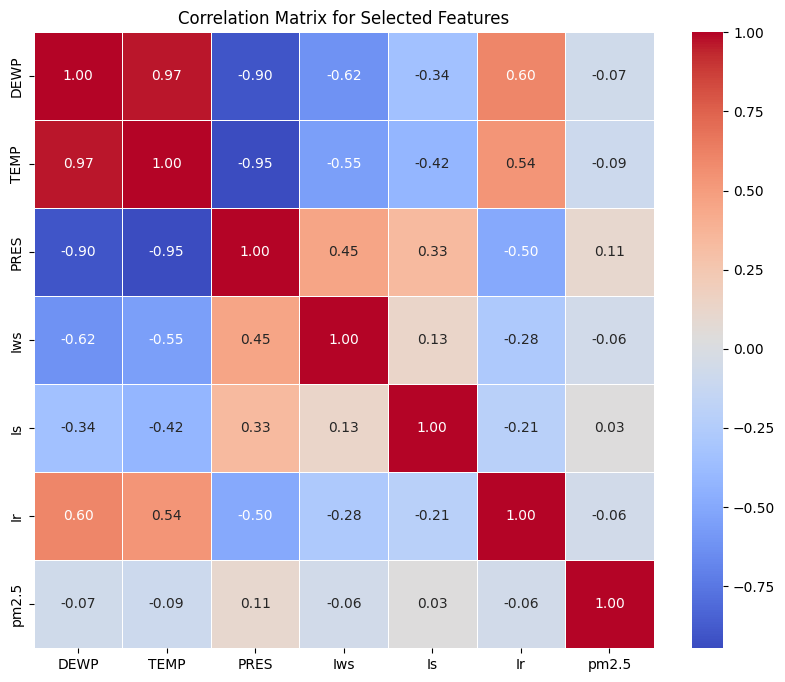

In [112]:
# Select the features of interest
selected_features = ['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'pm2.5']
df_selected = merged_df[selected_features]

# Compute the correlation matrix
correlation_matrix = df_selected.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Selected Features")
plt.show()

In [114]:
merged_df = merged_df.drop(columns='DEWP', errors='ignore')

merged_df.head()

,No,year,month,day,hour,cbwd,TEMP,PRES,Iws,Is,Ir,pm2.5
Datetime,,,,,,,,,,,,
2010-01-01 00:00:00,1,2010,1,1,0,NW,-11.000000,1021.00,1.790000,0.0,0.0,129.0
2010-01-01 01:00:00,2,2010,1,1,1,NW,-11.500000,1020.50,3.355000,0.0,0.0,129.0
2010-01-01 02:00:00,3,2010,1,1,2,NW,-11.333333,1020.00,4.473333,0.0,0.0,129.0
2010-01-01 03:00:00,4,2010,1,1,3,NW,-12.000000,1019.75,5.815000,0.0,0.0,129.0
2010-01-01 04:00:00,5,2010,1,1,4,NW,-12.000000,1019.40,7.246000,0.0,0.0,129.0


In [115]:
# the file path where you want to save the CSV
file_path = "merged_data.csv"

# Save the DataFrame to a CSV file
merged_df.to_csv(file_path, index=True)  # Include the index (Datetime) in the CSV

# Confirm the file was saved
print(f"DataFrame saved to {file_path}")

DataFrame saved to merged_data.csv
